In [100]:
#importing necessary modules
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import codecs
sns.set()

## Data Wrangling and Cleaning
In this section I will be importing the dataset and cleaning it for exploration

In [198]:
#reading in excel file to pandas dataframe
df=pd.read_excel('./data/jester-data-1.xls',header=None)

In [199]:
#setting name of first column to the number of jokes rated
#now each row is a single user and each column is a joke and the values are a users ratings of that joke
df=df.rename(columns = {0:'jokes_rated'})
df.head()

,jokes_rated,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [200]:
#changing all 99 values to 0's to indicate that the user had no imput about the joke
df=df.replace(to_replace=99.00, value=0.00)
df.head()

,jokes_rated,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,48,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


## Data Exploration

Now that the dataset has been properly wrangled and clean I want to investigate the following

1) least and most popular jokes

2) histogram average rating for each user 

3) histogram of the average ratings per joke

4) relationship between average user rating and number of jokes rated 

5) relationship between average joke rating and # of ratings for a joke

### Jokes and their popularity

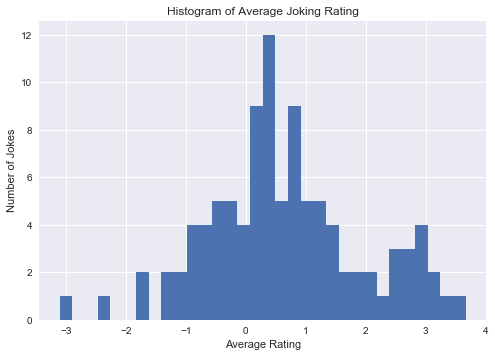

In [201]:
#calculating average score for each joke using .apply()
funniest=df.apply(np.mean,axis=0)

#removing the number of ratings columns
funniest=funniest[1:]
#print(funniest)

#sorting by average rating
sorted_funny=sorted(funniest, reverse=True)
#print(sorted_funny)

plt.hist(sorted_funny,bins=32)
plt.xlabel('Average Rating')
plt.ylabel('Number of Jokes')
plt.title('Histogram of Average Joking Rating')
plt.show()

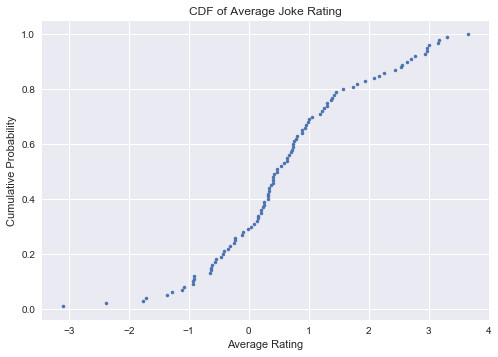

In [202]:
def ecdf(data):
    #RETURNS X AND Y DATA FOR A ECDF
    x=np.sort(data)
    y=np.arange(1,len(x)+1)/len(x)
    return x,y

x,y=ecdf(sorted_funny)
plt.plot(x,y,marker='.',linestyle='none')
plt.title('CDF of Average Joke Rating')
plt.xlabel("Average Rating")
plt.ylabel('Cumulative Probability')
plt.show()

In [203]:
#sorting by value to retain joke number information
jokes_and_rating=funniest.sort_values(ascending=False)

#selecting top and bottom 5 jokes
top_5=jokes_and_rating[:5]
bottom_5=jokes_and_rating[-5:]

#iterating through top 5 jokes
x=1
for num,rating in top_5.iteritems():
    
    #formatting and scrapping of html file
    filename="./data/jokes/init"+str(num)+".html"
    f=codecs.open(filename, 'r')
    html = f.read()
    start=html.find('<!--begin of joke -->')
    end=html.find('<!--end of joke -->')
    string=html[start+len('<!--begin of joke -->'):end]
    
    print('#'+str(x)+" with rating of "+ str(rating))
    print(string)
    print ('*' * 30)
    x+=1
       

#1 with rating of 3.66347116039

A guy goes into confession and says to the priest, "Father, I'm 80 years
old, widower, with 11 grandchildren. Last night I met two beautiful flight
attendants. They took me home and I made love to both of them. Twice."
<P>
The priest said: "Well, my son, when was the last time you were in
confession?"
<p> "Never Father, I'm Jewish."
<p> "So then, why are you telling me?"
<p> "I'm telling everybody."

******************************
#2 with rating of 3.3101136773

A guy walks into a bar, orders a beer and says to the bartender,
"Hey, I got this great Polish Joke..." 
<P>
The barkeep glares at him and says in a warning tone of voice:
"Before you go telling that joke you better know that I'm Polish, both
bouncers are Polish and so are most of my customers"
<P>
"Okay" says the customer,"I'll tell it very slowly." 

******************************
#3 with rating of 3.17973461954

Clinton returns from a vacation in Arkansas and walks down  the
steps of Air Forc

In [204]:
bottom_5=jokes_and_rating[-5:]

#iterating through top 5 jokes
x=5
for num,rating in bottom_5.iteritems():
    
    #formatting and scrapping of html file
    filename="./data/jokes/init"+str(num)+".html"
    f=codecs.open(filename, 'r')
    html = f.read()
    start=html.find('<!--begin of joke -->')
    end=html.find('<!--end of joke -->')
    string=html[start+len('<!--begin of joke -->'):end]
    
    #Printing
    print('#'+str(x)+" worst with rating of "+ str(rating))
    print(string)
    print ('*' * 30)
    x-=1

#5 worst with rating of -1.36749229476

<p>A horse walks into a bar. Bartender says:
<p>"So, why the long face?"

******************************
#4 worst with rating of -1.70579153825

Q:  What did the blind person say when given some matzah?
<BR><BR>
A:  Who the hell wrote this?

******************************
#3 worst with rating of -1.76274066365

They asked the Japanese visitor if they have elections in his
country.  <BR><BR>
"Every Morning" he answers.

******************************
#2 worst with rating of -2.38675619421

How many teddybears does it take to change a lightbulb?
<p>
It takes only one teddybear, but it takes a whole lot of lightbulbs.

******************************
#1 worst with rating of -3.10382380018

Q. What is orange and sounds like a parrot?  <BR><BR>

A. A carrot.

******************************


Above we have shown the top and bottom 5 jokes based on their average rating and we also explored the average rating for jokes.  We see that is centralized at a little above 0 which follows logic.

Now I will investigate each users average rating of the jokes that he has seen, evaluating the relative cynicalness of each user.

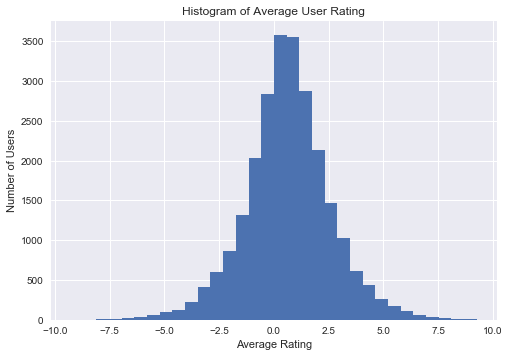

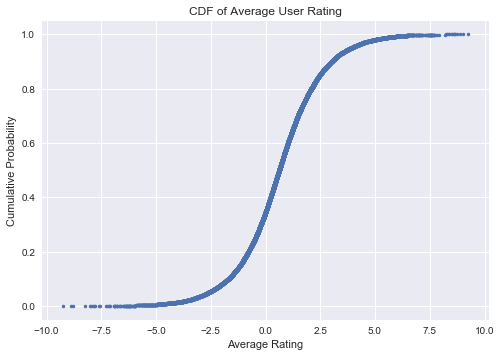

In [205]:
count=df['jokes_rated']
users=df.drop(['jokes_rated'],axis=1)
user_avg_rating=users.apply(np.mean,axis=1)
#print(user_avg_rating)
ratings=user_avg_rating.values
#print(ratings)

plt.hist(ratings,bins=32)
plt.xlabel('Average Rating')
plt.ylabel('Number of Users')
plt.title('Histogram of Average User Rating')
plt.show()


x,y=ecdf(ratings)
plt.plot(x,y,marker='.',linestyle='none')
plt.title('CDF of Average User Rating')
plt.xlabel("Average Rating")
plt.ylabel('Cumulative Probability')
plt.show()

Here we see graphical represnetation of average user rating.  We see that looks to be normally distributed however it has a mean slightly greater than 0. 

Now I will investigate the relationship between average joke rating and # of ratings for a joke. My guess would be that as a user rates more jokes, his average rating for a joke increase, indicating a positive correlation between the two variables.  My thought behind this is that a happier person would read more jokes, or as one reads more jokes they find them more funny.  Also it is important to note the the jokes are provided through the recommendation system for jester.com so this correlation would also imply that the recommendation engine for jester.com is doing its job.



Pearson correlational coefficient: 0.123322537363


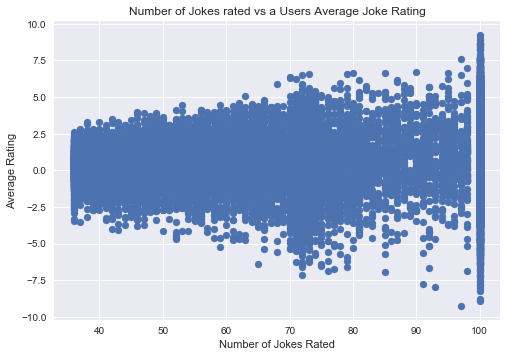

In [206]:
#formating data frame
x=pd.DataFrame(count)
x['avg_rating']=ratings
x=x[x.jokes_rated>30]

#calculating correlation
matrix=np.corrcoef(x.jokes_rated,x.avg_rating)
print('Pearson correlational coefficient:',matrix[0][1])

#plotting
plt.scatter(x.jokes_rated,x.avg_rating)
plt.title('Number of Jokes rated vs a Users Average Joke Rating')
plt.xlabel("Number of Jokes Rated")
plt.ylabel('Average Rating')
plt.show()

Here we sought to determine the relationship between number of jokes rated and average rating.  We calculated a pearson correlational coefficeint of 0.12 indicating a small positive correlation meaning as number of jokes rated increases, average rating increases as well.  However, visualizing this relationship does not give us that impression that the two are correlated.  The only insight that I can draw is that as number of jokes rated increases, there is a visible increase in variance.  

Now I will investigate the relationship between average rating for a joke and number of ratings a joke has recieved.  My first thougth would be that as number of ratings increases, the average rating of joke becomes less extreme, meaning as more peole see the joke its average rating comes closer to average.

In [208]:
df=pd.read_excel('./data/jester-data-1.xls',header=None)
df=df.rename(columns = {0:'jokes_rated'})


Pearson correlational coefficient: -0.0982619996016


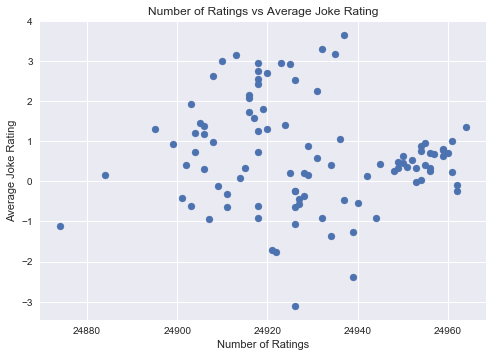

In [209]:
#formating of data frame to retreive number of ratings for a joke
df_temp=df.replace(to_replace=99.00, value='NaN')
count=df_temp.apply(np.count_nonzero,axis=0)
count=count[1:]

#formating of data frame to obtain average rating for a joke
df_temp=df.replace(to_replace=99.00, value=0.00)
avg_rating=df_temp.apply(np.mean,axis=0)
avg_rating=avg_rating[1:]

#creating data from the two above metrics
y=pd.DataFrame(count,columns=['count'])
y['avg_rating']=avg_rating.values

#calculating correlation
matrix=np.corrcoef(y['count'],y['avg_rating'])
print('Pearson correlational coefficient:',matrix[0][1])

#plotting
plt.scatter(y['count'],y['avg_rating'])
plt.title('Number of Ratings vs Average Joke Rating')
plt.xlabel("Number of Ratings")
plt.ylabel('Average Joke Rating')
plt.show()

Above we see that there is only a very small negative correlation between number of ratings for a joke and that jokes average rating. Althougth from the graph it is very difficult to see any trend.  I believe this is because there is not a very large spread in the number of ratings.  The smaller number of ratings is  ab